In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random as r

In [ ]:
# Lade Daten
ant = np.load("ant.npy").astype(int)
antdummy = np.load("antdummy.npy").astype(int)
x, y = ant.shape
worst = x*y

In [ ]:
antdummy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Setze Parameter.
n = 10
# TODO: Setzt die Parameter eures Genetischen Algorithmus.
nSurv = 6
nMutations = 800
maxIter = 1000


In [ ]:
# Initialisierung.
P = np.zeros((n,x,y),dtype=int)
fitness = np.zeros(n)

In [ ]:
# Generiere Startpopulation.
# TODO: Kommentiert/Unkommentiert eine der Zeilen, um eine der Startpopulationen zu erhalten.
for i in range(n):
    P[i] = np.random.randint(0, 2, size=(x, y))
    # P[i] = antdummy

print(np.sum(P[1]))
inital_P = P.copy()

15760


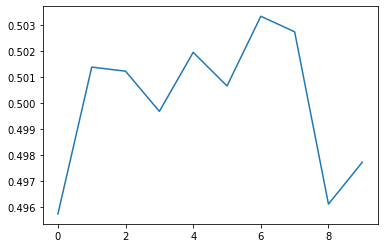

In [ ]:
# Initiale Fitness.
# TODO: Berechnet Fitness der Startpopulation.
def calc_fitness():
    
    for p in range(n):
        # Berechne die Differenz aller Pixel zwischen Zielameise und Individuum und summiere den Wert.
        # f = 0
        # for iX in range(x):
        #     for iY in range(y):
        #         print(P[p][iX][iY] - ant[iX][iY])
        fitness[p] = 1 - np.sum(np.abs(np.subtract(ant, P[p]))) / worst
            
calc_fitness()
initial_fitness = fitness.copy()

plt.plot(fitness)


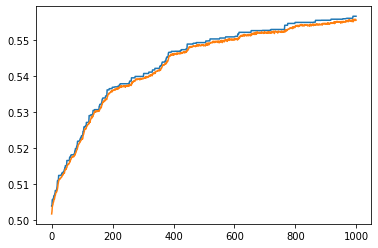

In [ ]:
means = []
graph = []
for k in range(maxIter):

    # Selektion.
    # TODO: Selektiert die besten Individuen.
    

    fitIndex =  fitness.argsort()
    P = P[fitIndex[::-1]]
    # calc_fitness()
    # plt.plot(fitness)
    surv = P[:nSurv] # Wähle die letzten/besten nSurv Individuen
    

    # Rekombination.
    # TODO: Generiert neue Individuen aus Überlebenden durch Rekombination.
    for i in range(n-nSurv):
        dad = surv[r.randint(0, nSurv-1)]
        mom = surv[r.randint(0, nSurv-1)]
        divider = r.randint(50, 120)
        child = np.copy(dad)
        for iX in range(int(x/2)-1):
            for iY in range(y-1):
                  child[iX][iY] = mom[iX][iY]
        
        # Mutation.
        # TODO: Mutiere zufällig die neuen Individuen.
        for j in range(0, nMutations):
            child[r.randint(0, x-1)][r.randint(0, y-1)] = r.randint(0,1)

        P[-i-1] = child

    # Fitness-Update.
    # TODO: Berechne Fitness der neuen Generation.
    calc_fitness()
    # plt.plot(fitness)
    

    # Abbruchkriterium, falls Population sehr gut ist.
    if (min(fitness) >= 0.98):
        break
    means.append(fitness.mean())
    graph.append(max(fitness))
    
plt.plot(graph)
plt.plot(means)


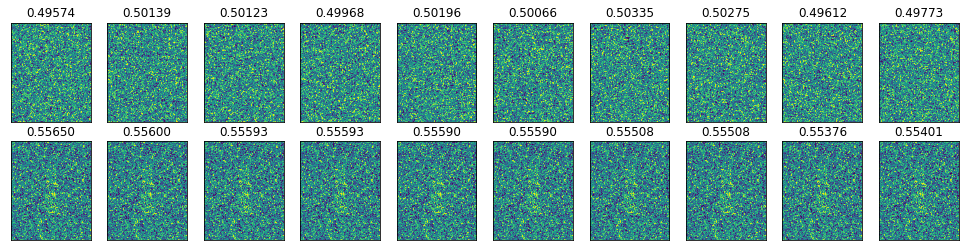

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=10,figsize=(17,4))
for i in range(n):
    ax[0,i].imshow(inital_P[i])
    ax[0,i].axes.yaxis.set_visible(False)
    ax[0,i].axes.xaxis.set_visible(False)
    ax[0,i].set_title("{:1.5f}".format(initial_fitness[i]))
     
    ax[1,i].imshow(P[i])
    ax[1,i].axes.yaxis.set_visible(False)
    ax[1,i].axes.xaxis.set_visible(False)
    ax[1,i].set_title("{:1.5f}".format(fitness[i]))

plt.savefig("antFarm.png",format="png")